## MIMIC - III Experiments - In-hospital Mortality Prediction


In [1]:
import pandas as pd
from collections import Counter
from tqdm import tqdm
import ast
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/ML Final Project/cohort/mp/admission_only_true/MP_IN_adm_train_disease_ner_final.csv", header=0)

In [4]:
df = df.iloc[:33954]
df

,id,subject_id,gender,dob,admittime,ethnicity,text,hospital_expire_flag,all_entities
0,107384,26027,M,2166-07-13 00:00:00,2205-11-13 21:31:00,WHITE,"CHIEF COMPLAINT: AMS, concern for toxic alcoho...",0,"['AM ##OH', 'p ##olysubstance abuse', 'seizure..."
1,101061,1578,F,2060-11-17 00:00:00,2139-05-18 22:35:00,WHITE,CHIEF COMPLAINT: abdominal pain\n\nPRESENT ILL...,0,"['abdominal pain HTN', 'CH ##F', 'OS ##A', 'vo..."
2,127180,92652,M,2104-07-14 00:00:00,2192-06-09 14:58:00,UNKNOWN/NOT SPECIFIED,CHIEF COMPLAINT: Bilateral Sub Dural Hematoma\...,0,"['Bilateral Sub Dural Hematoma', 'CA ##D', 'si..."
3,168339,20953,M,2052-08-25 00:00:00,2139-10-22 04:11:00,BLACK/AFRICAN AMERICAN,CHIEF COMPLAINT: Intracranial bleed\n\nPRESENT...,0,"['H ##TN', ""Parkinson ' s disease"", 'left basa..."
4,154044,19409,F,2092-09-28 00:00:00,2164-04-30 14:54:00,WHITE,CHIEF COMPLAINT: ischemic left foot\n\nPRESENT...,0,"['ische ##mic left foot', 'left foot ischemia'..."
...,...,...,...,...,...,...,...,...,...
33949,122869,5271,M,2110-12-25 00:00:00,2159-05-31 11:01:00,UNKNOWN/NOT SPECIFIED,CHIEF COMPLAINT: Fever and neutropenia.\n\nPRE...,0,"['ne ##utropenia', 'es ##ophageal cancer', 'pa..."
33950,145612,18439,M,2129-09-16 00:00:00,2199-06-03 20:19:00,WHITE,CHIEF COMPLAINT: Chest pain.\n\nPRESENT ILLNES...,0,"['Chest pain', 'chest pain substernal chest pa..."
33951,152495,2128,F,2112-09-30 00:00:00,2166-11-22 22:00:00,UNKNOWN/NOT SPECIFIED,CHIEF COMPLAINT: \n\nPRESENT ILLNESS: The pati...,0,"['lung cancer shortness of breath', 'h ##ypote..."
33952,182652,31910,M,2029-10-16 00:00:00,2109-01-14 17:46:00,WHITE,"CHIEF COMPLAINT: Malaise, fever, chills, and L...",0,"['Mal ##aise', 'L wrist pain', 'se ##ptic arth..."


In [5]:
def preprocess_text(cell_content):
    try:
        # Use ast.literal_eval to safely evaluate the string
        data_list = ast.literal_eval(cell_content)
    except (SyntaxError, ValueError):
        print("Error parsing the string. Ensure the format is correct.")
        return None

    cleaned_list = []
    for item in data_list:
        # Remove ' ##'
        cleaned_item = re.sub(r'\s##', '', item)
        # Remove any other special characters (except spaces, letters, and digits)
        cleaned_item = re.sub(r'[^A-Za-z0-9\s]', '', cleaned_item)
        # Strip leading and trailing whitespace
        cleaned_item = cleaned_item.lower().strip()
        cleaned_list.append(cleaned_item)

    return cleaned_list

df['all_entities'] = df['all_entities'].apply(preprocess_text)

print(df['all_entities'][:3])

0    [amoh, polysubstance abuse, seizure disorder, ...
1    [abdominal pain htn, chf, osa, vomit, loss, di...
2    [bilateral sub dural hematoma, cad, sick sinus...
Name: all_entities, dtype: object


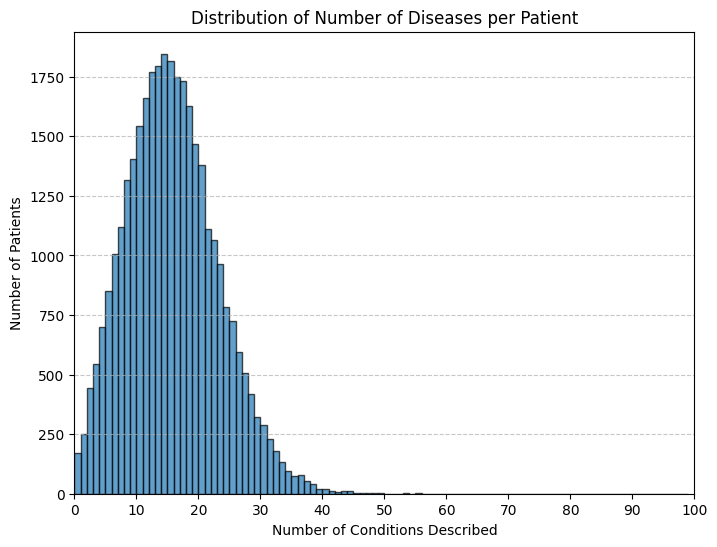

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

df['num_diseases'] = df['all_entities'].apply(len)

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['num_diseases'], bins=range(0, 100), edgecolor='black', alpha=0.7)
plt.title('Distribution of Number of Diseases per Patient')
plt.xlabel('Number of Conditions Described')
plt.ylabel('Number of Patients')
plt.xlim(0, 100)
plt.xticks(range(0, 101, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [6]:

vocab = Counter()


for entities in tqdm(df['all_entities'], desc="Processing entities"):
    vocab.update(entities)
vocab = dict(vocab)

print(f"Vocabulary size: {len(vocab)}")

top_diseases = dict(Counter(vocab).most_common(50))
print("Top 10 Diseases by Frequency:", top_diseases)

Processing entities: 100%|██████████| 33954/33954 [00:00<00:00, 194841.56it/s]


Vocabulary size: 82668
Top 10 Diseases by Frequency: {'chest pain': 11491, 'hypertension': 10985, 'abdominal pain': 6635, 'htn': 5035, 'shortness of breath': 5020, 'diarrhea': 4733, 'coronary artery disease': 4644, 'dyspnea': 4162, 'hyperlipidemia': 4014, 'h': 3710, 'nausea': 3605, 'atrial fibrillation': 3344, 'hypercholesterolemia': 3326, 'headache': 3144, 'hypotension': 3099, 'copd': 2884, 'chf': 2664, 'fever': 2540, 'cough': 2510, 'cad': 2435, 'ed': 2400, 'weakness': 2197, 'dizziness': 2181, 'hypothyroidism': 2176, 'dysuria': 2138, 'sob': 2130, 'orthopnea': 2119, 'palpitations': 1902, 'asthma': 1885, 'constipation': 1878, 'lightheadedness': 1869, 'mi': 1827, 'syncope': 1823, 'vomiting': 1802, 'aortic stenosis': 1772, 'congestive heart failure': 1768, 'fatigue': 1730, 'depression': 1696, 'dm': 1677, 'pmh': 1662, 'ca': 1643, 'cp': 1611, 'd': 1596, 'gerd': 1589, 'stroke': 1565, 'as': 1552, 'melena': 1505, 'anemia': 1469, 'myocardial infarction': 1450, 'respiratory distress': 1448}


In [22]:

freq_based_on_occ = {}

for entities in tqdm(df['all_entities'], desc="Processing entities"):
    set_entities = set(entities)
    for e in entities:
      if freq_based_on_occ.get(e):
        freq_based_on_occ[e] += 1
      else:
        freq_based_on_occ[e] = 1

Processing entities: 100%|██████████| 33954/33954 [00:00<00:00, 113581.43it/s]


In [23]:


import pandas as pd

freq_df = pd.DataFrame.from_dict(freq_based_on_occ, orient='index', columns=['freq'])
freq_df = freq_df.sort_values(by='freq', ascending=False)
freq_df

,freq
chest pain,11491
hypertension,10985
abdominal pain,6635
htn,5035
shortness of breath,5020
...,...
scleral icterus apical expiy wheeze,1
multiple cvas,1
crf dyspnea,1
substernal epigastric pain,1


In [ ]:
freq_df.head(100)

,freq
chest pain,11491
hypertension,10985
abdominal pain,6635
htn,5035
shortness of breath,5020
...,...
hepatitis c,781
nstemi,776
e,773
paroxysmal nocturnal dyspnea,762


In [24]:
filtered_vocab = {disease: freq for disease, freq in freq_based_on_occ.items() if freq >= 100}

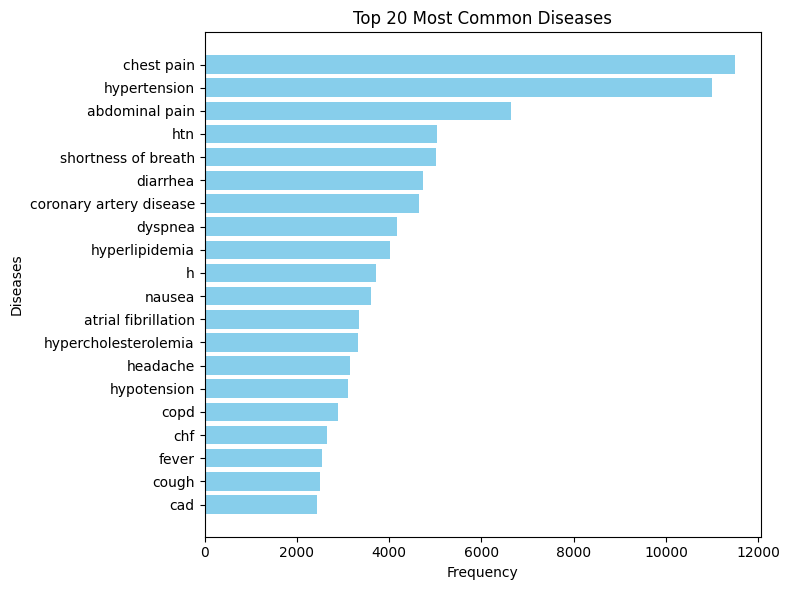

In [25]:


import matplotlib.pyplot as plt

sorted_diseases = dict(sorted(filtered_vocab.items(), key=lambda item: item[1], reverse=True))

top_20_diseases = dict(list(sorted_diseases.items())[:20])

diseases = list(top_20_diseases.keys())
frequencies = list(top_20_diseases.values())

plt.figure(figsize=(8, 6))
plt.barh(diseases, frequencies, color='skyblue')
plt.xlabel("Frequency")
plt.ylabel("Diseases")
plt.title("Top 20 Most Common Diseases")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [13]:
import numpy as np
mean_freq = np.mean(list(vocab.values()))
median_freq = np.median(list(vocab.values()))
print(mean_freq)
print(median_freq)

filtered_vocab = {disease: freq for disease, freq in vocab.items() if freq >= mean_freq}


print(f"Filtered Vocabulary Size: {len(filtered_vocab)}")

6.273152852373348
1.0
Filtered Vocabulary Size: 4680


<ipython-input-65-d9657a2f032c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Disease', data=top_diseases_df, palette='viridis')


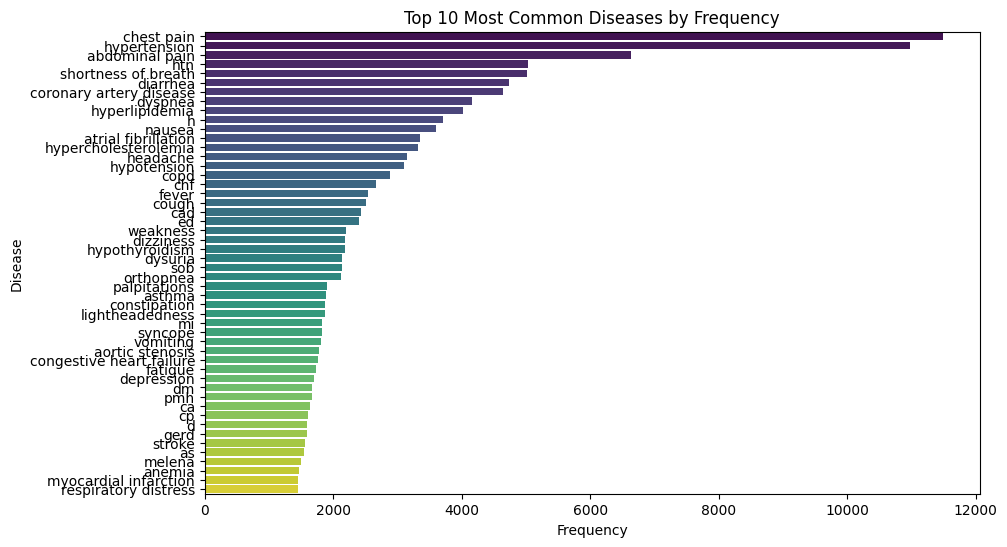

In [ ]:
top_diseases_df = pd.DataFrame(top_diseases.items(), columns=['Disease', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Disease', data=top_diseases_df, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Disease')
plt.title('Top 10 Most Common Diseases by Frequency')
plt.show()

In [ ]:

def filter_entities(entities, vocab):
    return [entity for entity in entities if entity in vocab]

df['all_entities'] = df['all_entities'].apply(lambda x: filter_entities(x, filtered_vocab) if isinstance(x, list) else [])


In [16]:
train_df = pd.read_csv("/content/drive/MyDrive/ML Final Project/cohort/mp/admission_only_true/train_med7.csv", header=0)


In [17]:
train_df.columns

Index(['id', 'subject_id', 'gender', 'dob', 'admittime', 'ethnicity', 'text',
       'hospital_expire_flag', 'all_entities'],
      dtype='object')

In [18]:
tqdm.pandas()

def extract_drugs(all_entities):
    return [entity[0] for entity in all_entities if entity[1] == 'DRUG']

train_df['all_entities'] = train_df['all_entities'].apply(eval)
train_df['drugs_list'] = train_df['all_entities'].apply(extract_drugs)

In [27]:
all_drugs = [drug for drug_list in train_df['drugs_list'] for drug in drug_list]


drug_frequency = Counter(all_drugs)

frequency_dict = dict(drug_frequency)
sorted_dict = dict(sorted(frequency_dict.items(), key=lambda item: item[1], reverse=True))

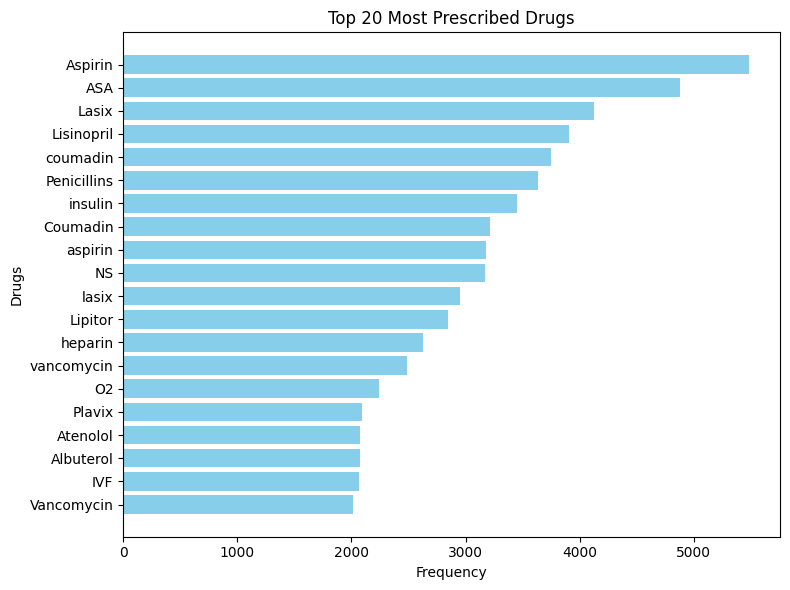

In [28]:


import matplotlib.pyplot as plt
top_20_drugs = dict(list(sorted_dict.items())[:20])
drugs = list(top_20_drugs.keys())
frequencies = list(top_20_drugs.values())


plt.figure(figsize=(8, 6))
plt.barh(drugs, frequencies, color='skyblue')
plt.xlabel("Frequency")
plt.ylabel("Drugs")
plt.title("Top 20 Most Prescribed Drugs")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

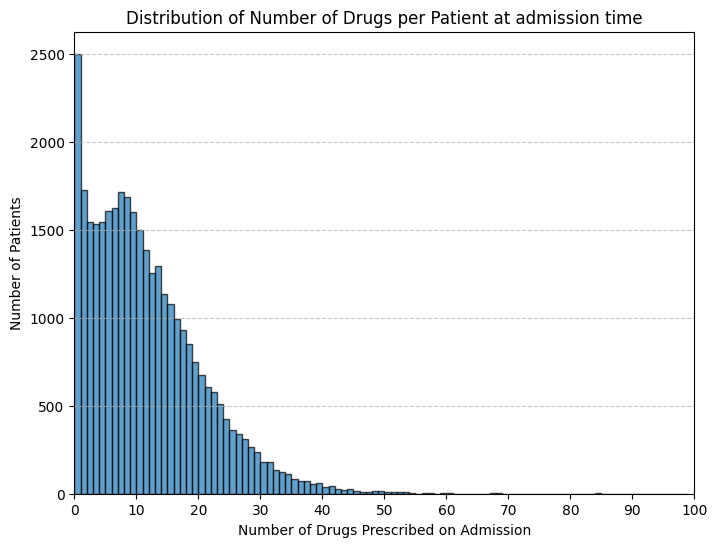

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

train_df['num_drugs'] = train_df['drugs_list'].apply(len)


plt.figure(figsize=(8, 6))
plt.hist(train_df['num_drugs'], bins=range(0, 100), edgecolor='black', alpha=0.7)
plt.title('Distribution of Number of Drugs per Patient at admission time')
plt.xlabel('Number of Drugs Prescribed on Admission')
plt.ylabel('Number of Patients')
plt.xlim(0, 100)
plt.xticks(range(0, 101, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()